# Superstore Task

# Author:- Rahul Kumar
# Datascience and Business Analytics intern

# Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sample=pd.read_csv('SampleSuperstore.csv')
sample.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
sample.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
sample.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Text(0.5, 0, 'Sales Value')

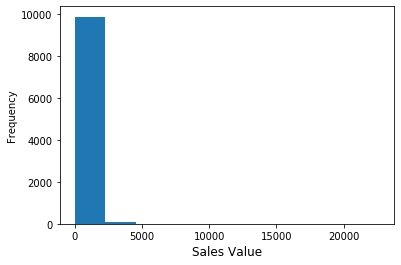

In [6]:
sample['Sales'].plot.hist(bins=10)
plt.xlabel('Sales Value',fontsize=12)

In [7]:
col=['Postal Code']
sample1=sample.drop(columns=col,axis=1)

In [8]:
sample['Category'].value_counts()/len(sample)*100

Office Supplies    60.296178
Furniture          21.222734
Technology         18.481089
Name: Category, dtype: float64

In [9]:
sample['Sub-Category'].value_counts()/len(sample)*100

Binders        15.239143
Paper          13.708225
Furnishings     9.575745
Phones          8.895337
Storage         8.465079
Art             7.964779
Accessories     7.754653
Chairs          6.173704
Appliances      4.662798
Labels          3.642185
Tables          3.191915
Envelopes       2.541525
Bookcases       2.281369
Fasteners       2.171303
Supplies        1.901141
Machines        1.150690
Copiers         0.680408
Name: Sub-Category, dtype: float64

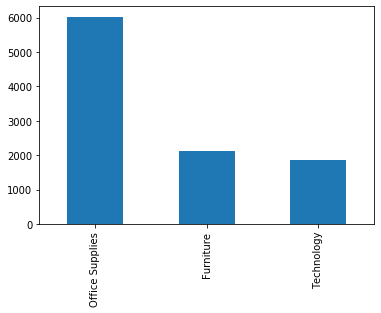

In [10]:
sample['Category'].value_counts().plot(kind = 'bar')

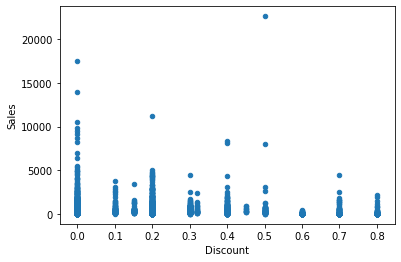

In [11]:
sample.plot.scatter('Discount','Sales')

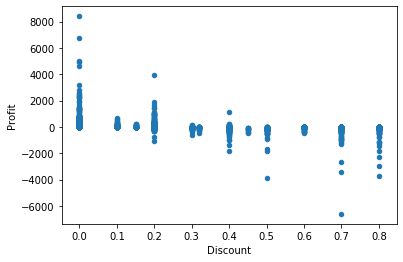

In [12]:
sample.plot.scatter('Discount','Profit')

In [13]:
sample.pivot_table(values='Profit', index ='Discount', aggfunc='median')

,Profit
Discount,
0.00,15.9952
0.10,54.3240
0.15,14.0980
0.20,6.4944
0.30,-25.3764
0.32,-46.9764
0.40,-57.6242
0.45,-167.3184
0.50,-185.2767


In [14]:
from sklearn.utils import shuffle

# Shuffling the Dataset
sample = shuffle(sample, random_state = 42)

# Creating 4 division
div = int(sample.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = sample.loc[:3*div+1,:]
test = sample.loc[3*div+1:]

In [15]:
test.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7495,Standard Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Binders,4.448,2,0.2,1.4456
3485,Standard Class,Corporate,United States,Newark,Delaware,19711,East,Office Supplies,Binders,7.920,4,0.0,3.5640
3132,First Class,Corporate,United States,Oceanside,New York,11572,East,Furniture,Furnishings,13.280,2,0.0,6.3744
2375,Standard Class,Consumer,United States,Smyrna,Georgia,30080,South,Office Supplies,Fasteners,5.670,3,0.0,0.1134
5082,Standard Class,Consumer,United States,Monroe,North Carolina,28110,South,Technology,Accessories,35.168,4,0.2,8.3524


In [16]:
train.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3125,First Class,Corporate,United States,Lakeland,Florida,33801,South,Office Supplies,Storage,563.808,4,0.2,21.1428
1441,Second Class,Consumer,United States,San Francisco,California,94110,West,Office Supplies,Binders,36.672,2,0.2,11.4600
4510,Standard Class,Corporate,United States,Springfield,Missouri,65807,Central,Furniture,Furnishings,37.300,2,0.0,17.1580
39,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Chairs,212.058,3,0.3,-15.1470
4509,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Furniture,Tables,171.288,3,0.2,-6.4233


# Simple Mean (mean of Item_Sales)

In [17]:
test['simple_mean'] = train['Sales'].mean()

In [18]:
from sklearn.metrics import mean_absolute_error as MAE

simple_mean_error = MAE(test['Sales'], test['simple_mean'])
simple_mean_error

271.78557201575506

# Mean Item Sales with respect to Type

In [19]:
out_type = pd.pivot_table(train, values='Sales', index = ['Discount'], aggfunc=np.mean)
out_type

,Sales
Discount,
0.00,211.880478
0.10,303.217412
0.15,650.192818
0.20,239.366900
0.30,589.254849
0.32,371.238067
0.40,589.915756
0.45,817.710667
0.50,2540.158333


In [20]:
out_type = pd.pivot_table(train, values='Sales', index = ['Category'], aggfunc=np.mean)
out_type

,Sales
Category,
Furniture,377.982542
Office Supplies,123.822832
Technology,517.634681


In [21]:
test['out_type_mean'] = 0

for i in train['Category'].unique():
    test['out_type_mean'][test['Category'] == str(i)] = train['Sales'][train['Category'] == str(i)].mean()

In [22]:
out_type_error = MAE(test['Sales'], test['out_type_mean'])
out_type_error

248.57366430015193

# Mean Sales with respect to Profit

In [23]:
out_profit = pd.pivot_table(train, values='Sales', index = ['Profit'], aggfunc = np.mean)
out_profit

,Sales
Profit,
-3839.9904,7999.980
-3399.9800,2549.985
-2639.9912,1799.994
-1862.3124,4297.644
-1850.9464,1088.792
...,...
1415.4296,4355.168
1644.2913,4535.976
1995.9900,3991.980


In [24]:
out_profit = MAE(test['Sales'], test['Profit'])
out_profit

194.7839790865695

# Sales wrt Discount and Profit

In [25]:
out_profit = pd.pivot_table(train, values='Sales', index = ['Profit','Discount'], aggfunc = np.mean)
out_profit

,,Sales
Profit,Discount,
-3839.9904,0.5,7999.980
-3399.9800,0.7,2549.985
-2639.9912,0.7,1799.994
-1862.3124,0.4,4297.644
-1850.9464,0.8,1088.792
...,...,...
1415.4296,0.2,4355.168
1644.2913,0.2,4535.976
1995.9900,0.0,3991.980


In [26]:
sample1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


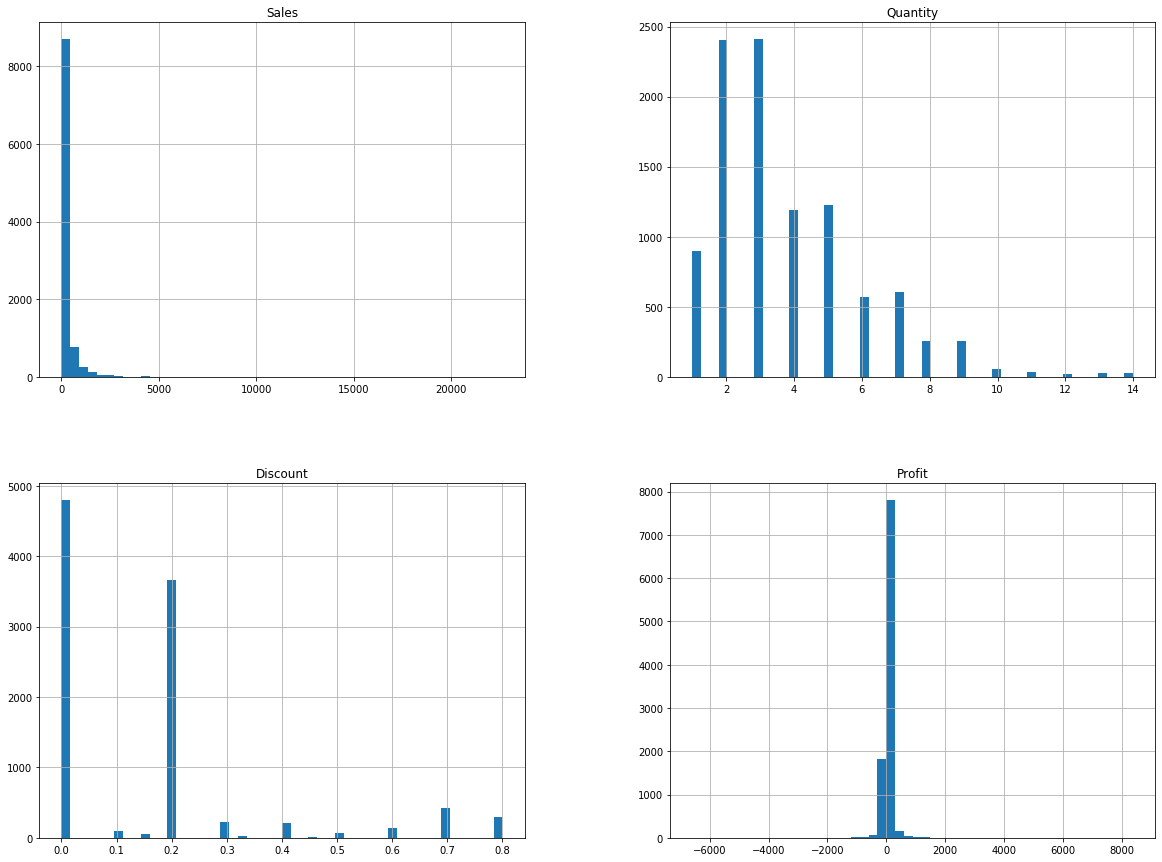

In [27]:
sample1.hist(bins=50 ,figsize=(20,15))
plt.show();

Text(0.5, 0.98, 'Pie Consumption Patterns in the United States')

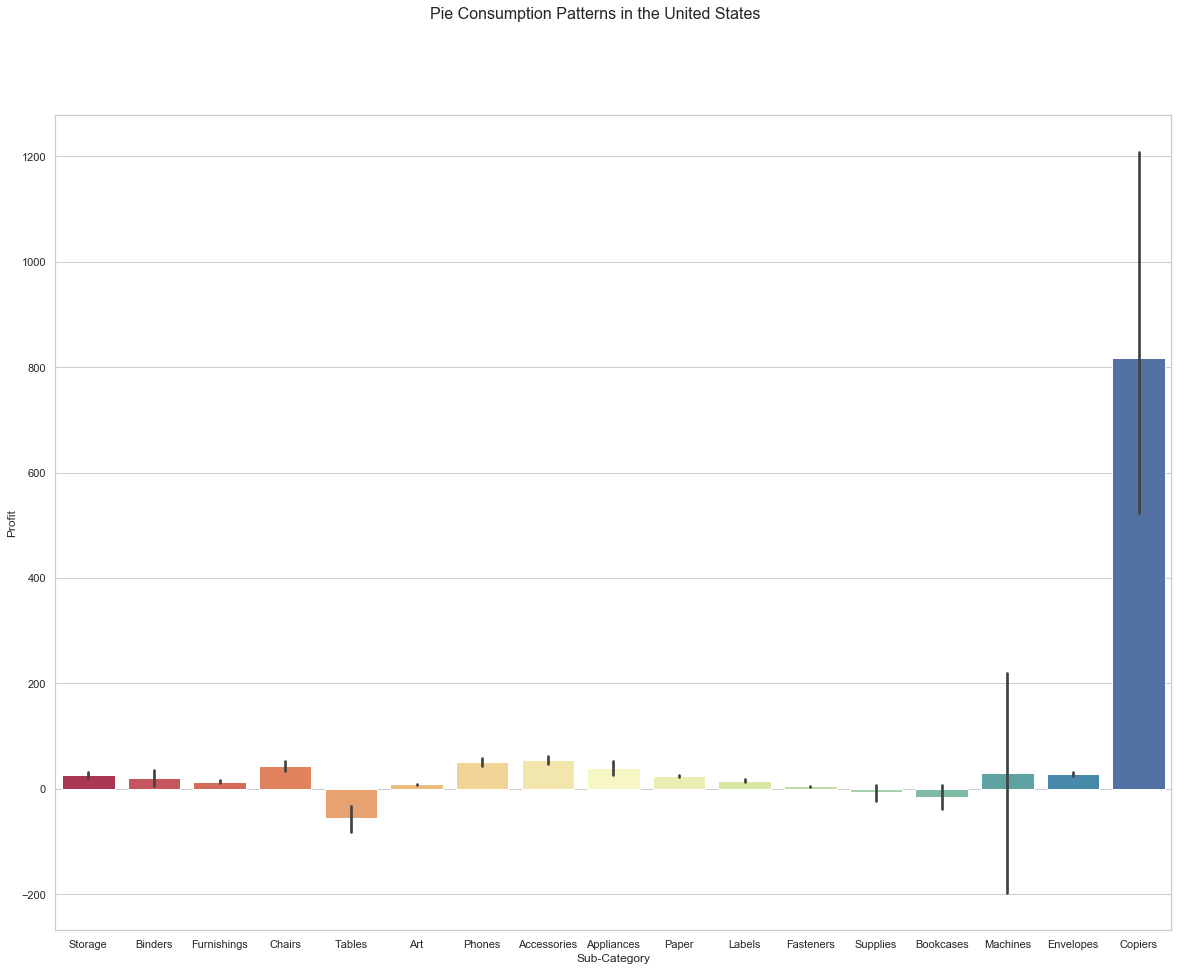

In [28]:
sns.set(style="whitegrid")
plt.figure(2, figsize=(20,15))

sns.barplot(x='Sub-Category',y='Profit', data=sample, palette='Spectral')

plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)

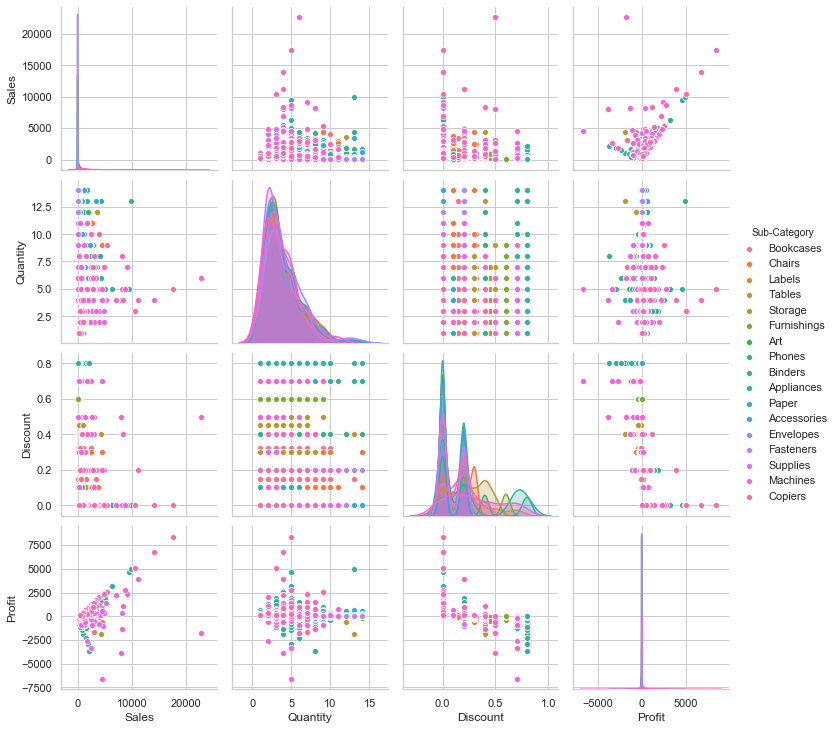

In [29]:
figsize=(15,10)
sns.pairplot(sample1,hue='Sub-Category')

# From the above plot we can see that Dataset has some amount of outliers too.

In [30]:
grouped=pd.DataFrame(sample.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
grouped

,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


In [31]:
sample.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


# Using Cluster Analysis(K-Mean Clustering)

In [32]:
x = sample.iloc[:, [9, 10, 11, 12]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)

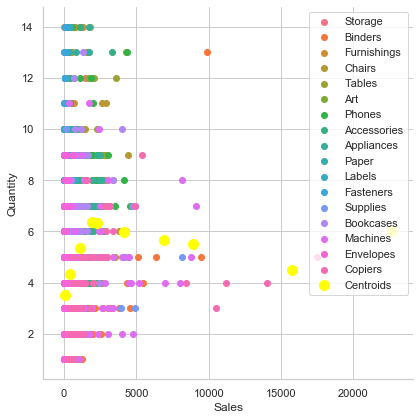

In [33]:
sns.set_style("whitegrid") 
sns.FacetGrid(sample, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

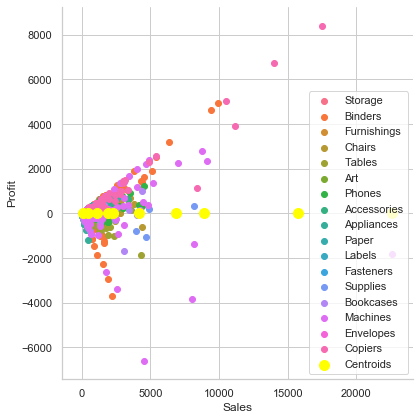

In [34]:
sns.set_style("whitegrid") 
sns.FacetGrid(sample, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Profit')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# From the Above data Visualization and Clustering we can see that in Which states and in which Category Sales and profits are High or less,We can improve in that States By Providing Discounts in prefered Range so that Company and cosumer both will be in profit.So For Deciding that Range we have to do some Technical Analysis.One can Do it through Factor Analysis,or also can Do it throgh neural networks.